# Task 4
## Работа с данными оттока пользователей "churn"

### План работы

**Анализ набора данных**
- Разбиение на типы данных

**Устранение пропусков в данных**

Удаление или заполнение пропусков
- Качественные 
- Количественные

**Кодирование качественных признаков**

**Нормализация числовых признаков**
- Проанализировать данные на кореляццию
- Выделить признаки, корелирующие 
- Подготовить данные для моделирования

**Обработка выбросов**

**Отбор признаков**

**Обучение**
- Разбиение на train test
- Выбор лучшей модели

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df_original = pd.read_csv('churn_dataset.csv')

In [3]:
df = df_original.copy() # Делаем копию, чтобы оставить нетронутым df_original

Первичный осмотр данных

In [4]:
df.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005


In [5]:
df.tail()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,S,U,U,U,Y,U,Y,773.0,1099996
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,N,U,U,Y,Y,Y,Y,835.0,1099997
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,U,Y,Y,U,U,U,N,433.0,1099998
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,S,U,U,U,U,U,N,75.0,1099999
99999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,H,U,U,U,U,U,N,5.0,1100000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

In [7]:
n, m = df.shape
f'Строк - {n}, Столбоцов - {m}'

'Строк - 100000, Столбоцов - 100'

Разобьём датафрейм на качественные и количественные значения

In [8]:
df_a = df.select_dtypes(include=['O'])
df_d = df.select_dtypes(include=['int64', 'float64'])

### Работа с пропусками
#### Качественные

In [9]:
# Переведём в проценты, чтобы лучше анализировать
na_info = df_a.isna().sum().sort_values()*100/n

# Оставим с пропусками
na_info = na_info[na_info > 0]

In [10]:
na_info

dualband             0.001
refurb_new           0.001
area                 0.040
kid11_15             1.732
kid6_10              1.732
kid3_5               1.732
kid0_2               1.732
ethnic               1.732
marital              1.732
kid16_17             1.732
creditcd             1.732
prizm_social_one     7.388
hnd_webcap          10.189
infobase            22.079
dwlltype            31.909
ownrent             33.706
HHstatin            37.923
dwllsize            38.308
dtype: float64

Признак можно было бы безоговорочно удалить при отсутсвии 50+% значений. Таких у нас нет.<br>
Признаки у которых малый процент пропусков будем заполнять релевантной центральной мерой (мода, среднее, медиана). Признаки с большими (5+%) рассмотим индивидуально.

In [11]:
# Выделим столюцы с пропусками > 5%

cols_a_na_big = na_info[na_info > 5]
cols_a_na_big

prizm_social_one     7.388
hnd_webcap          10.189
infobase            22.079
dwlltype            31.909
ownrent             33.706
HHstatin            37.923
dwllsize            38.308
dtype: float64

#### prizm_social_one   -   7.388% пропущено

churn,0,1
prizm_social_one,,
C,8.666,8.352
R,2.315,2.580
S,16.345,15.752
T,7.369,7.620
U,12.165,11.448


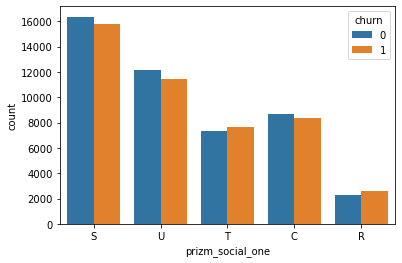

In [12]:
sns.countplot(x='prizm_social_one', hue='churn', data=df)
(df.groupby('prizm_social_one')['churn'].value_counts()*100/n).unstack()

Заполнение пропущенных значений сильно исказят данные

In [13]:
df_a = df_a.drop('prizm_social_one', axis=1)

#### hnd_webcap  -        10.189% пропущенных значений


churn,0,1
hnd_webcap,,
UNKW,0.149,0.086
WC,6.049,7.794
WCMB,40.078,35.655


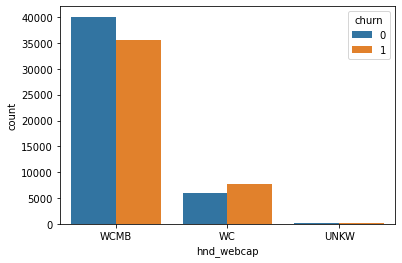

In [14]:
sns.countplot(x='hnd_webcap', hue='churn', data=df)
(df.groupby('hnd_webcap')['churn'].value_counts()*100/n).unstack()

Есть переменная *UNKW*, которая скорее всего означает UNKNOWN 

Заполним пропуски этой переменной

In [15]:
df_a.hnd_webcap = df_a.hnd_webcap.fillna('UNKW')

#### infobase    -        22.079% пропущенных значений


churn,0,1
infobase,,
M,39.686,38.011
N,0.150,0.074


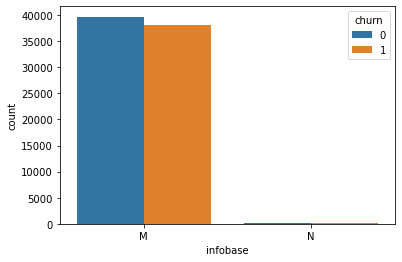

In [16]:
sns.countplot(x='infobase', hue='churn', data=df)
(df.groupby('infobase')['churn'].value_counts()*100/n).unstack()

Infobase, скорее всего соответсвие с базой. Поэтому это важная переменная.  А пропуски лучше заполнить N - 'not'

In [17]:
df_a.infobase = df_a.infobase.fillna('N')

#### dwlltype   -         31.909%  пропущенных значений


churn,0,1
dwlltype,,
M,9.692,9.640
S,25.163,23.596


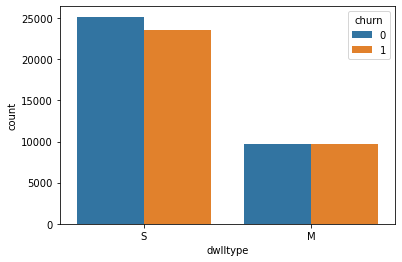

In [18]:
sns.countplot(x='dwlltype', hue='churn', data=df)
(df.groupby('dwlltype')['churn'].value_counts()*100/n).unstack()

Новое значение добавлять будет неверно, а добавление 31% пропусков исказит данные - удаляем

In [19]:
df_a = df_a.drop('dwlltype', axis=1)

#### ownrent - 33.706% пропущенных значений


churn,0,1
ownrent,,
O,32.965,31.319
R,0.966,1.044


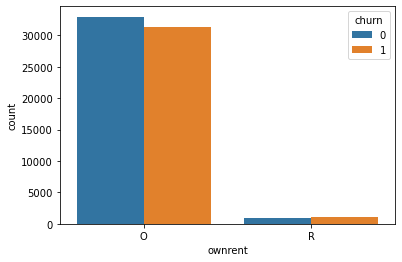

In [20]:
sns.countplot(x='ownrent', hue='churn', data=df)
(df.groupby('ownrent')['churn'].value_counts()*100/n).unstack()

In [21]:
df_a = df_a.drop('ownrent', axis=1)

#### HHstatin       -     37.923% пропущенных значений


churn,0,1
HHstatin,,
A,0.500857,0.499143
B,0.520333,0.479667
C,0.513623,0.486377
G,0.497169,0.502831
H,0.477790,0.522210
I,0.519025,0.480975


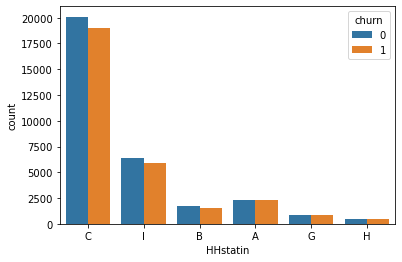

In [22]:
sns.countplot(x='HHstatin', hue='churn', data=df)
(df.groupby('HHstatin')['churn'].value_counts(normalize=True)).unstack()

При всех значеним признака отношение исхода 0 и 1 примерно одинаково и похоже что HHstatin не сильно коррелирует с целевым признаком.

In [23]:
df_a = df_a.drop('HHstatin', axis=1)

#### dwllsize        -    38.308% пропущенных значений


churn,0,1
dwllsize,,
A,0.515772,0.484228
B,0.504323,0.495677
C,0.524382,0.475618
D,0.491299,0.508701
E,0.539595,0.460405
F,0.507317,0.492683
G,0.515068,0.484932
H,0.480132,0.519868
I,0.466418,0.533582


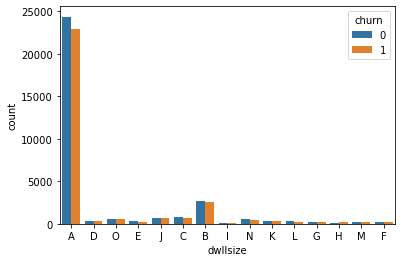

In [24]:
sns.countplot(x='dwllsize', hue='churn', data=df)
(df.groupby('dwllsize')['churn'].value_counts(normalize=True)).unstack()

In [25]:
df_a = df_a.drop('dwllsize', axis=1)

#### Остались переменные с маленьким количеством пропусков
Качественные переменные заполняю модой.

In [26]:
colsa_na = df_a.columns[df_a.isna().any()]

In [27]:
for column in colsa_na:
    top = df_a[column].mode()[0]
    df_a[column] = df_a[column].fillna(top)

In [28]:
df_a.info() # Проверка на пропуски

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   new_cell    100000 non-null  object
 1   crclscod    100000 non-null  object
 2   asl_flag    100000 non-null  object
 3   area        100000 non-null  object
 4   dualband    100000 non-null  object
 5   refurb_new  100000 non-null  object
 6   hnd_webcap  100000 non-null  object
 7   marital     100000 non-null  object
 8   infobase    100000 non-null  object
 9   ethnic      100000 non-null  object
 10  kid0_2      100000 non-null  object
 11  kid3_5      100000 non-null  object
 12  kid6_10     100000 non-null  object
 13  kid11_15    100000 non-null  object
 14  kid16_17    100000 non-null  object
 15  creditcd    100000 non-null  object
dtypes: object(16)
memory usage: 12.2+ MB


### Замена пропусков в количественных переменных

In [29]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 79 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   rev_Mean         99643 non-null   float64
 1   mou_Mean         99643 non-null   float64
 2   totmrc_Mean      99643 non-null   float64
 3   da_Mean          99643 non-null   float64
 4   ovrmou_Mean      99643 non-null   float64
 5   ovrrev_Mean      99643 non-null   float64
 6   vceovr_Mean      99643 non-null   float64
 7   datovr_Mean      99643 non-null   float64
 8   roam_Mean        99643 non-null   float64
 9   change_mou       99109 non-null   float64
 10  change_rev       99109 non-null   float64
 11  drop_vce_Mean    100000 non-null  float64
 12  drop_dat_Mean    100000 non-null  float64
 13  blck_vce_Mean    100000 non-null  float64
 14  blck_dat_Mean    100000 non-null  float64
 15  unan_vce_Mean    100000 non-null  float64
 16  unan_dat_Mean    100000 non-null  float

Выделяем признаки с наличием пропусков

In [30]:
colsd_na = df_d.columns[df_d.isna().any()]
na_info = (df_d[colsd_na].isna().sum()*100/n).sort_values()
na_info = dict(na_info)

В количественных переменных могут быть категориальные признаки. Для заполнения пропусков в них не подойдёт среднее значения - может появиться новое уникальное значение, что неправильно.


In [31]:
info_nu = df_d[colsd_na].nunique().sort_values()
info_nu

rv                 2
truck              2
forgntvl           2
numbcars           3
adults             6
income             9
models            14
lor               16
hnd_price         17
phones            24
da_Mean          172
avg6rev          451
datovr_Mean      774
avg6qty         1376
eqpdays         1555
ovrmou_Mean     2638
avg6mou         2941
roam_Mean       5337
vceovr_Mean     7516
change_mou      7711
totmrc_Mean     8491
mou_Mean        9730
ovrrev_Mean    12315
change_rev     32537
rev_Mean       37468
dtype: int64

Разобьем на категориальные и нет. Из логических соображений phones - последняя категориальная переменная ( в остальных суфикс означающий статистическое значение)

In [32]:
cols_categorical = info_nu[info_nu < 25].index # категориальные
cols_digit = info_nu[info_nu > 25].index       # Остальные

In [33]:
# Смотрим на пропуски в категориальных признаках

(df_d[cols_categorical].isna().sum()*100/n).sort_values()

models        0.001
phones        0.001
hnd_price     0.847
rv            1.732
truck         1.732
forgntvl      1.732
adults       23.019
income       25.436
lor          30.190
numbcars     49.366
dtype: float64

#### Наибольшие пропуски 

- adults       23.019
- income       25.436
- lor          30.190
- numbcars     49.366

Рассмотрим их по-отдельности

NaN - 23.019%


churn,0,1
adults,,
1.0,0.509395,0.490605
2.0,0.505142,0.494858
3.0,0.512402,0.487598
4.0,0.519709,0.480291
5.0,0.514428,0.485572
6.0,0.521379,0.478621


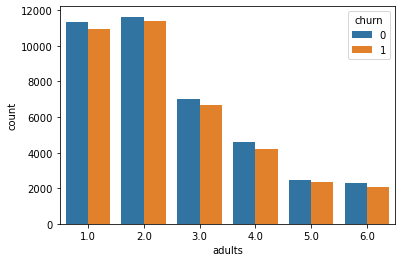

In [34]:
column = "adults"
sns.countplot(x=column, hue='churn', data=df)
print(f'NaN - {na_info[column]}%')
(df.groupby(column)['churn'].value_counts(normalize=True)).unstack()

In [35]:
# Удаляем
df_d = df_d.drop('adults', axis=1)

#### income       25.436


NaN - 25.436%


churn,0,1
income,,
1.0,2.044,1.989
2.0,1.196,1.064
3.0,3.037,2.793
4.0,4.038,3.752
5.0,4.246,4.031
6.0,9.568,9.234
7.0,5.748,5.849
8.0,2.623,2.519
9.0,5.585,5.248


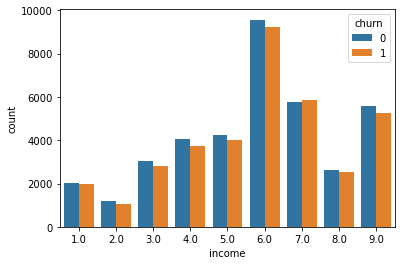

In [36]:
column = "income"
sns.countplot(x=column, hue='churn', data=df)
print(f'NaN - {na_info[column]}%')
(df.groupby(column)['churn'].value_counts(normalize=False)*100/n).unstack()

Заполним нулями 

In [37]:
df_d = df_d.drop('income', axis=1)

####  lor -          30.190


NaN - 30.19%


churn,0,1
lor,,
0.0,0.468308,0.531692
1.0,0.482328,0.517672
2.0,0.485476,0.514524
3.0,0.502137,0.497863
4.0,0.508227,0.491773
5.0,0.519481,0.480519
6.0,0.518395,0.481605
7.0,0.533849,0.466151
8.0,0.520650,0.479350


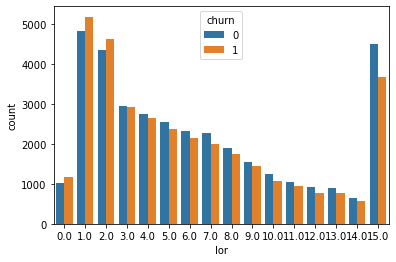

In [38]:
column = "lor"
sns.countplot(x=column, hue='churn', data=df)
print(f'NaN - {na_info[column]}%')
(df.groupby(column)['churn'].value_counts(normalize=True)).unstack()

In [39]:
df_d = df_d.drop('lor', axis=1)

#### numbcars     49.366

NaN - 49.366%


churn,0,1
numbcars,,
1.0,13.181,12.405
2.0,10.733,10.625
3.0,1.956,1.734


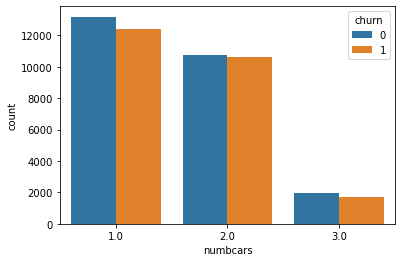

In [40]:
column = "numbcars"
sns.countplot(x=column, hue='churn', data=df)
print(f'NaN - {na_info[column]}%')
(df.groupby(column)['churn'].value_counts(normalize=False)*100/n).unstack()

Очевидно, что *numbcars* - количество машин. Вместо NaN добавляем новое уникальное значение - 0<br>


In [41]:
df_d.numbcars = df_d.numbcars.fillna(0.0)

Оставшиеся категориальные:

- models        0.001
- phones        0.001
- hnd_price     0.847
- rv            1.732
- truck         1.732
- forgntvl      1.732

In [42]:
fill_list = ['models', 'phones', 'hnd_price', 'rv', 'truck', 'forgntvl']

# Процент пропусков мал, поэтому заполним модой

for column in fill_list:
    top = df_d[column].mode()[0]
    df_d[column] = df_d[column].fillna(top)

#### Некатегориальные числовые значения

In [43]:
df_d[cols_digit].isna().sum()*100/n

da_Mean        0.357
avg6rev        2.839
datovr_Mean    0.357
avg6qty        2.839
eqpdays        0.001
ovrmou_Mean    0.357
avg6mou        2.839
roam_Mean      0.357
vceovr_Mean    0.357
change_mou     0.891
totmrc_Mean    0.357
mou_Mean       0.357
ovrrev_Mean    0.357
change_rev     0.891
rev_Mean       0.357
dtype: float64

Пропуски заполняются мерой центральной тенденции 

- Медианой
- Модой
- Средним

Посмотрим на распредление, чтобы определить как заполнять пропуски

In [44]:
df_info = df_d[cols_digit].describe().T
df_info['median'] = df_info.median(axis=1)

mod_list = []
for column in cols_digit:
    mode = df_d[column].mode()[0]
    mod_list.append(mode)
    
df_info['mode'] = mod_list
df_info

,count,mean,std,min,25%,50%,75%,max,median,mode
da_Mean,99643.0,0.888828,2.177619,0.0000,0.000,0.2475,0.9900,159.3900,0.939414,0.00
avg6rev,97161.0,58.683618,40.758577,-2.0000,34.000,50.0000,71.0000,866.0000,54.341809,31.00
datovr_Mean,99643.0,0.261318,3.126531,0.0000,0.000,0.0000,0.0000,423.5400,0.130659,0.00
avg6qty,97161.0,178.365157,182.724565,0.0000,59.000,127.0000,237.0000,3256.0000,180.544861,0.00
eqpdays,99999.0,391.932309,256.482193,-5.0000,212.000,342.0000,530.0000,1823.0000,366.966155,310.00
ovrmou_Mean,99643.0,41.072247,97.296150,0.0000,0.000,2.7500,42.0000,4320.7500,41.536123,0.00
avg6mou,97161.0,509.634576,496.663453,0.0000,163.000,363.0000,698.0000,7217.0000,503.149015,0.00
roam_Mean,99643.0,1.286405,14.711374,0.0000,0.000,0.0000,0.2350,3685.2000,0.760702,0.00
vceovr_Mean,99643.0,13.295062,30.056089,0.0000,0.000,0.6825,14.0250,896.0875,13.660031,0.00
change_mou,99109.0,-13.933818,276.087509,-3875.0000,-87.000,-6.2500,63.0000,31219.2500,28.375000,0.00


In [45]:
# Заполняем всё модой
for col in cols_digit:
    mode = df_info.loc[col, 'mode']
    df_d[col] = df_d[col].fillna(mode)

Мы избавились от всех пропусков! Ура!

### Кодирование качественных признаков

- Бинарные кодируем по как 0 и 1
- Категориальные при помощи добавление столбцов - значением класса и пометкой объекта как код 0100, где 1 - принадлежность объекта к значению класса 
- Остальные числовым заплнением

In [46]:
binar_cols = df_a.columns[df_a.nunique() == 2]
categorical = df_a.columns[(df_a.nunique() > 2) & (df_a.nunique() < 25)]
others = df_a.columns[df_a.nunique() > 25]

In [47]:
binar_fill = {'asl_flag':   {'N': 0, 'Y': 1},
              'refurb_new': {'N': 1, 'R': 0},
              'infobase':   {'M': 1, 'N': 0},
              'kid0_2':     {'U': 0, 'Y': 1},
              'kid3_5':     {'U': 0, 'Y': 1},
              'kid6_10':    {'U': 0, 'Y': 1},
              'kid11_15':   {'U': 0, 'Y': 1},
              'kid16_17':   {'U': 0, 'Y': 1},
              'creditcd':   {'Y': 1, 'N': 0}
             }

In [48]:
df_a = df_a.replace(binar_fill)

In [49]:
df_categorical = pd.get_dummies(df_a[categorical])

In [50]:
#Закодируем в числовые
crclscod_unique = list(df_a.crclscod.unique())
crc_cod = {}
i = 1

for value in crclscod_unique:
    crc_cod[value] = i
    i += 1

df_a.crclscod = df_a.crclscod.replace(crc_cod)

In [51]:
df_a = df_a.drop(categorical, axis=1)
frames = [df_a, df_categorical]
df_alpha = pd.concat(frames, axis=1)

In [52]:
df_alpha.dtypes

crclscod      int64
asl_flag      int64
refurb_new    int64
infobase      int64
kid0_2        int64
              ...  
ethnic_R      uint8
ethnic_S      uint8
ethnic_U      uint8
ethnic_X      uint8
ethnic_Z      uint8
Length: 61, dtype: object

df_alpha - дата фрейм с обработанными качественными признаками

### Работа с количественными значениями
- Нормализация
- Удаление выбросов

In [53]:
df_d.head()
df_d = df_d.drop('Customer_ID', axis=1)

Нормировать мы можем именно некатегориальные признаки.<br>
График распределения категориальных признаков является кусочным. Также там вряд-ли могут быть выбросы

In [54]:
# Выберем не категориальные признаки 

cols_full = df_d.columns[df_d.nunique() > 25] # Мы помним что у phone 24 nunique
cols_full

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'months', 'totcalls',
       'totmou', 'totrev', 'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou',
       'avgqty', 'avg3mou', 'avg3q

array([[<AxesSubplot:title={'center':'rev_Mean'}>,
        <AxesSubplot:title={'center':'mou_Mean'}>,
        <AxesSubplot:title={'center':'totmrc_Mean'}>],
       [<AxesSubplot:title={'center':'da_Mean'}>,
        <AxesSubplot:title={'center':'ovrmou_Mean'}>,
        <AxesSubplot:title={'center':'ovrrev_Mean'}>],
       [<AxesSubplot:title={'center':'vceovr_Mean'}>,
        <AxesSubplot:title={'center':'datovr_Mean'}>,
        <AxesSubplot:title={'center':'roam_Mean'}>],
       [<AxesSubplot:title={'center':'change_mou'}>,
        <AxesSubplot:title={'center':'change_rev'}>,
        <AxesSubplot:title={'center':'drop_vce_Mean'}>],
       [<AxesSubplot:title={'center':'drop_dat_Mean'}>,
        <AxesSubplot:title={'center':'blck_vce_Mean'}>,
        <AxesSubplot:title={'center':'blck_dat_Mean'}>],
       [<AxesSubplot:title={'center':'unan_vce_Mean'}>,
        <AxesSubplot:title={'center':'unan_dat_Mean'}>,
        <AxesSubplot:title={'center':'plcd_vce_Mean'}>],
       [<AxesSubplot:t

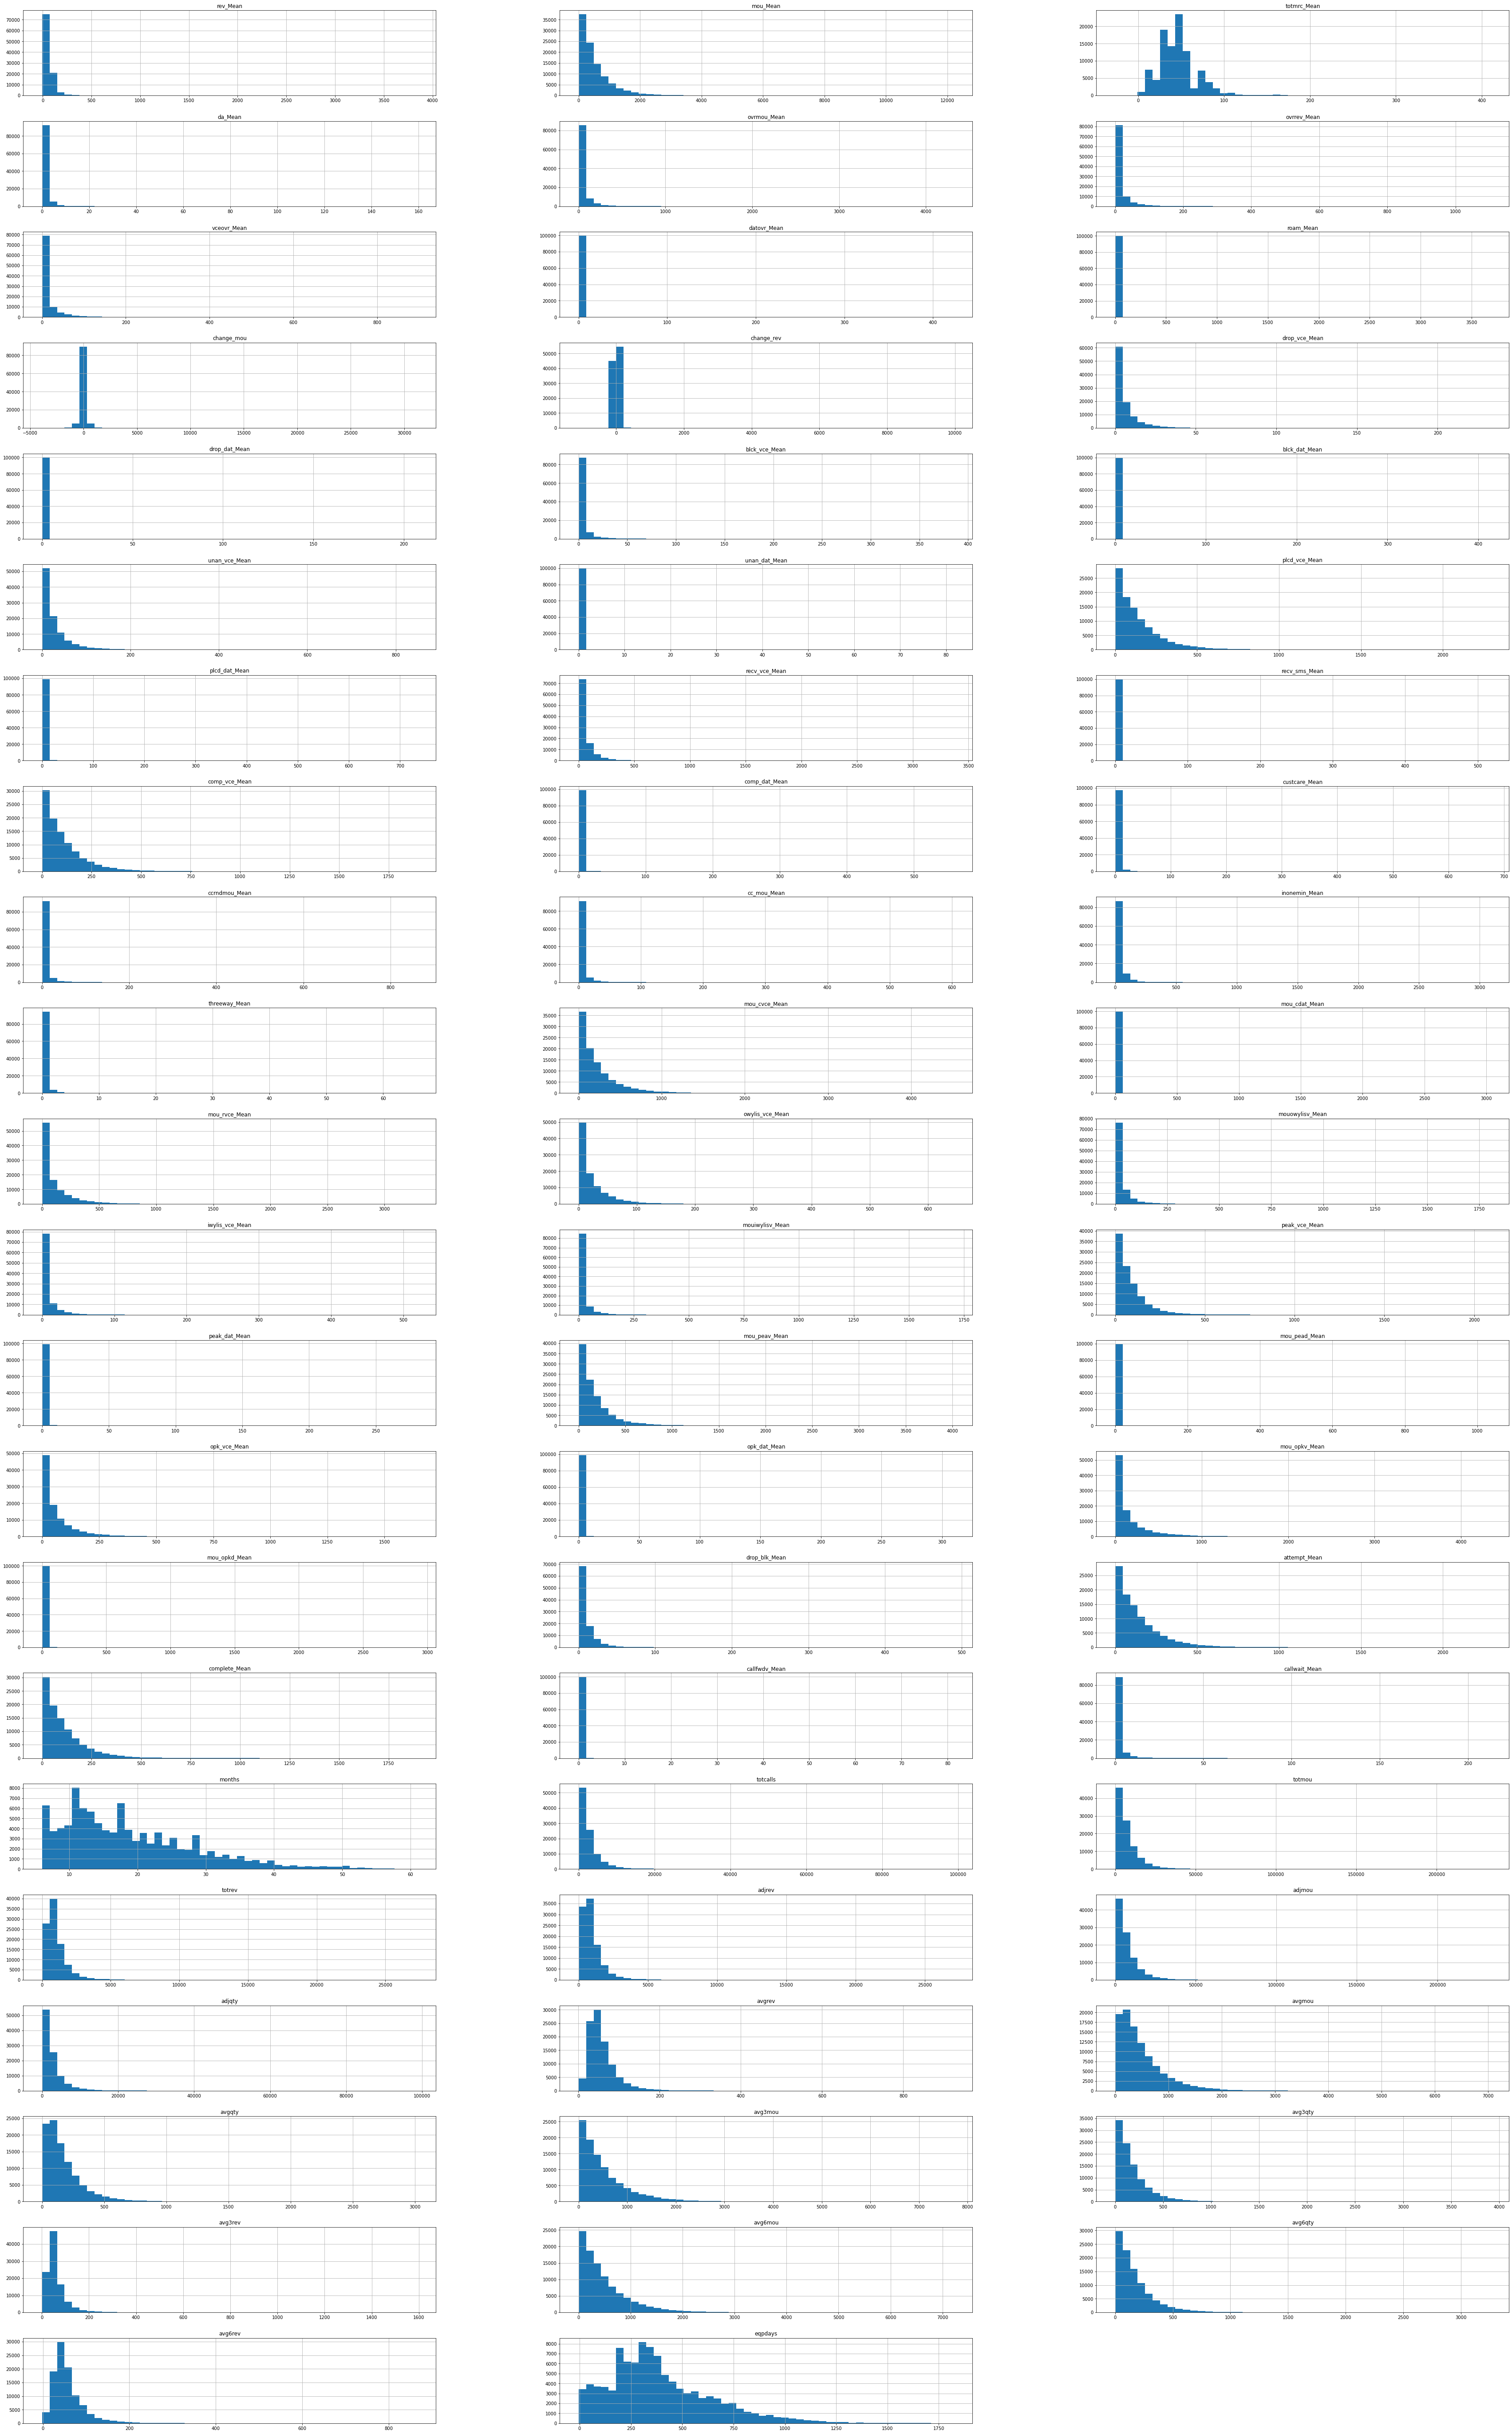

In [55]:
# Посмотрим на распределение признаков 

df_d[cols_full].hist(figsize=(60, 100), layout=(22, 3), bins=50)

У признаков распределения деляться на:
- Экспоненциальное
- Четко выраженный ноль с шумом в других значениях

Почти все признаки содержат значение 0, у некоторых оно является ещё и модой

Применить обратное распределение, логорифмирование не является возможным. Т.к. при 0 значение функция нормирования примет бесконечность. Преобразование Бокса-Кокса принимает натуральные числа - нам не подходит.

**Выбираем функцию нормирования - Преобразование Йео-Джонсона**


In [56]:
import scipy.stats as stats

def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(variable)
    plt.show()

Для примера посмотрим на распределение признаки с сильной модой = 0

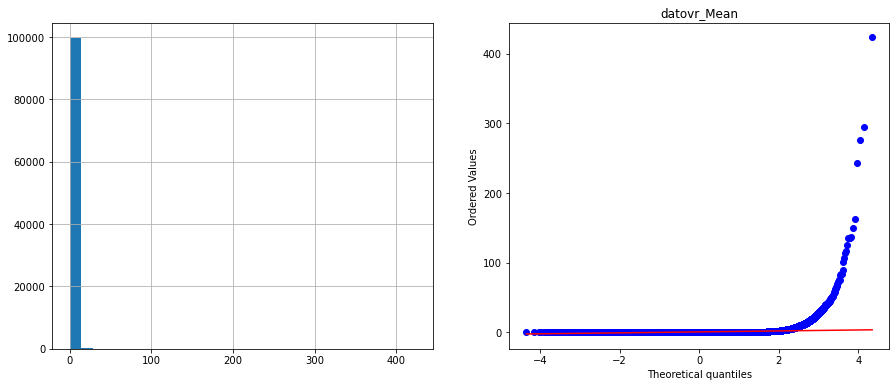

In [57]:
diagnostic_plots(df_d, 'datovr_Mean')

В принципе, такое распределение нас удовлетворяет. 
Как- то заметно улучшить его не предствялется возможным.

В будущем мы просто избавимся от выбросов.

In [58]:
# Признаки, которые можно отнормировать (близки к экспоненциальному распределению)

features_norm = ['months', 'totcalls', 'totmou', 'totrev', 'adjrev', 'adjmou', 'adjqty', 'avgrev',
                 'avgmou', 'avgqty', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev',
                 'eqpdays', 'rev_Mean', 'mou_Mean', 'totmrc_Mean', 'blck_vce_Mean', 'unan_vce_Mean','plcd_vce_Mean',
                 'comp_vce_Mean', 'mou_cvce_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'peak_vce_Mean',
                 'mou_peav_Mean', 'opk_vce_Mean', 'mou_opkv_Mean', 'attempt_Mean', 'complete_Mean']

In [59]:
cols_d_others = ['da_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean',
                 'change_mou', 'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_dat_Mean',
                 'unan_dat_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_dat_Mean',
                 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean', 'inonemin_Mean', 'threeway_Mean',
                 'mou_cdat_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_dat_Mean',
                 'mou_pead_Mean', 'opk_dat_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'callfwdv_Mean', 'callwait_Mean']


Оптимальное значение λ = -0.12292748308507671


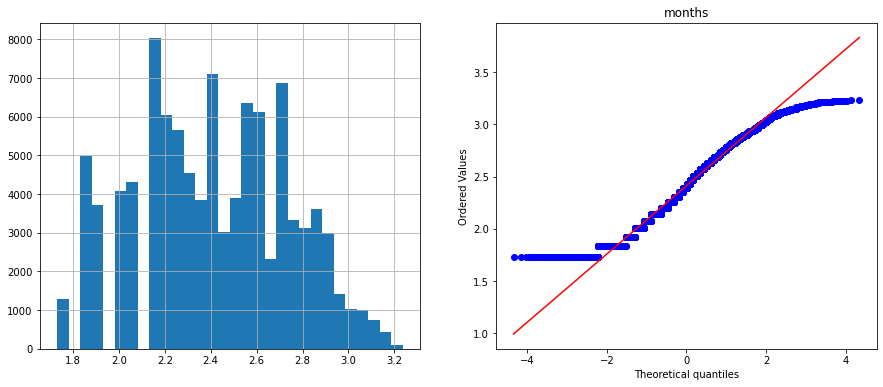

Оптимальное значение λ = 0.14455761476907425


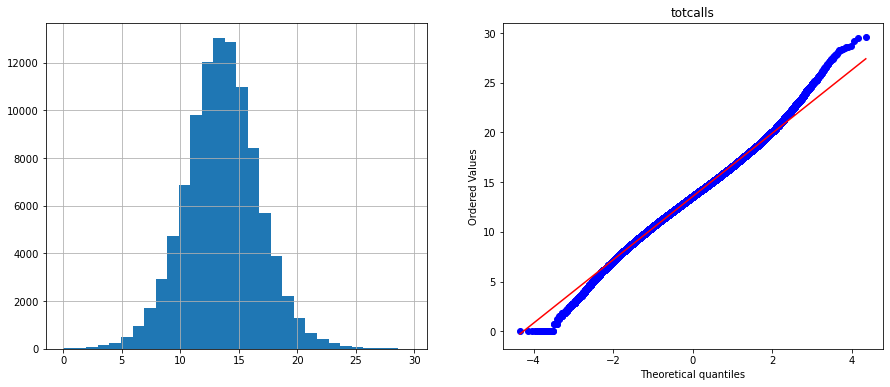

Оптимальное значение λ = 0.20279163304846148


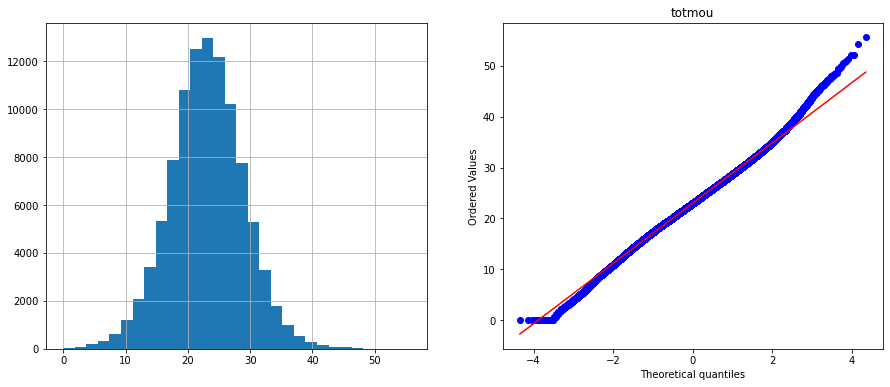

Оптимальное значение λ = 0.01042949226015201


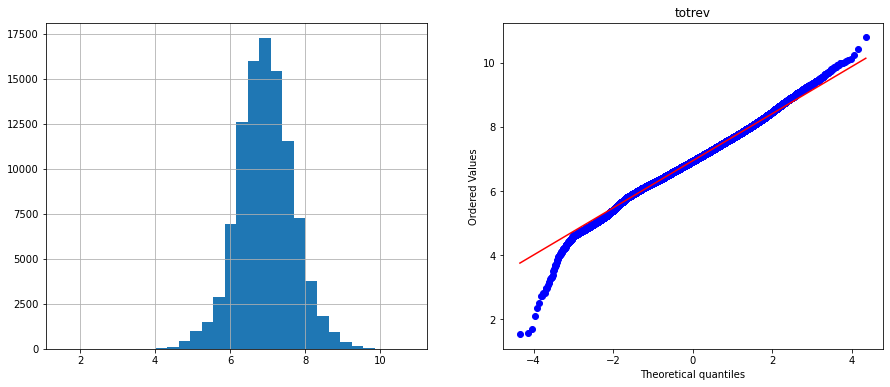

Оптимальное значение λ = 0.0654786355105373


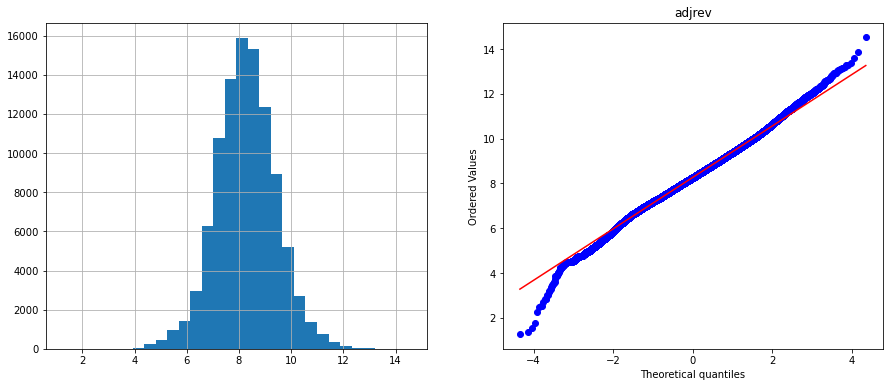

Оптимальное значение λ = 0.20622209198777525


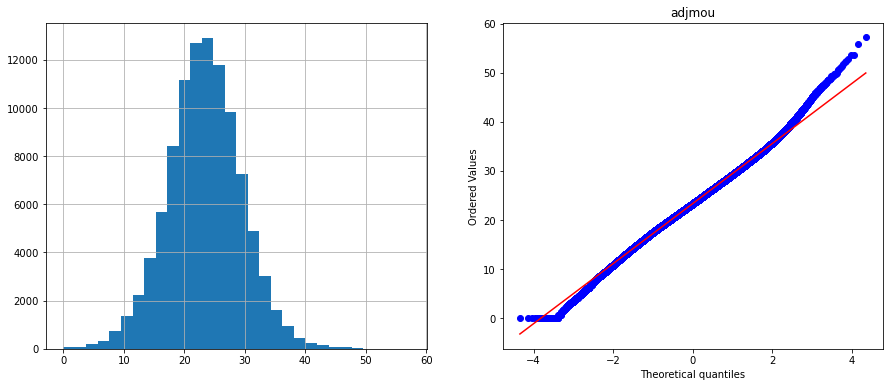

Оптимальное значение λ = 0.14942213208872807


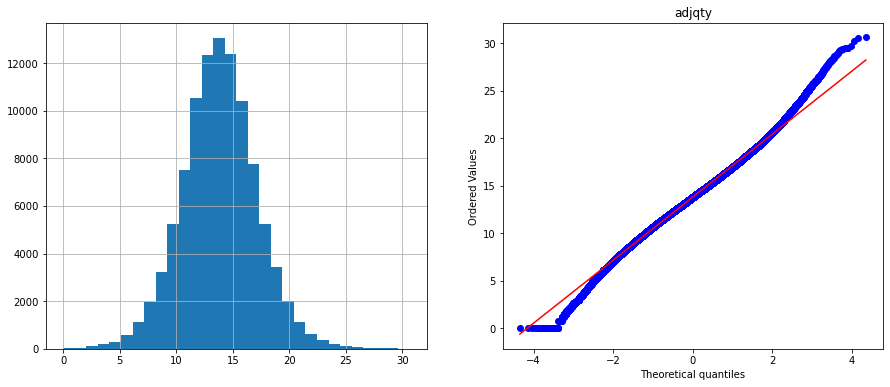

Оптимальное значение λ = 0.030498830607403726


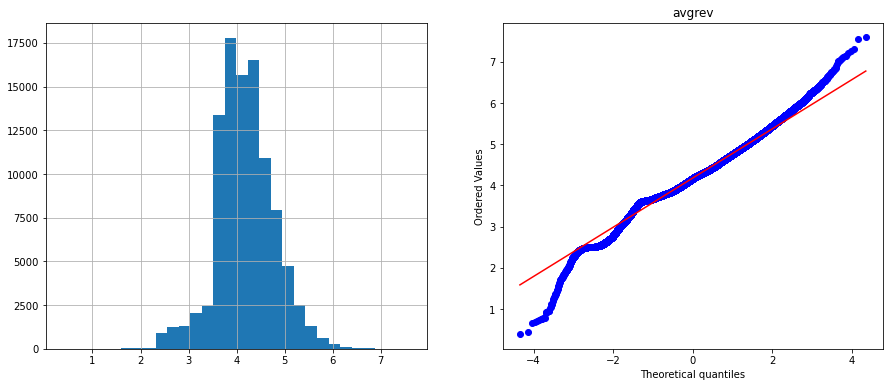

Оптимальное значение λ = 0.27410840654786955


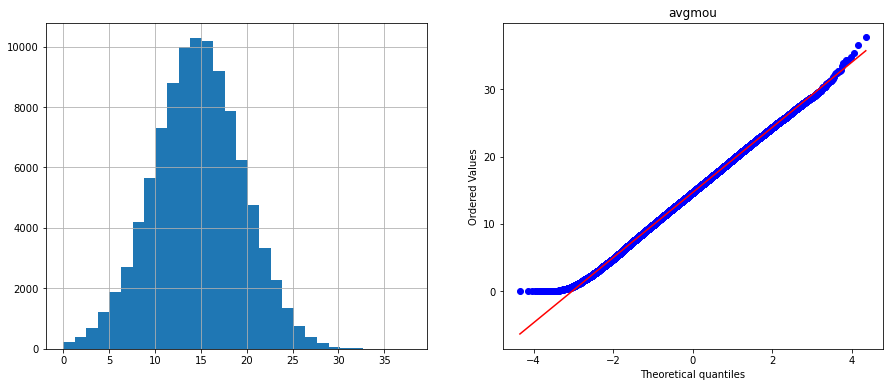

Оптимальное значение λ = 0.22250486831144825


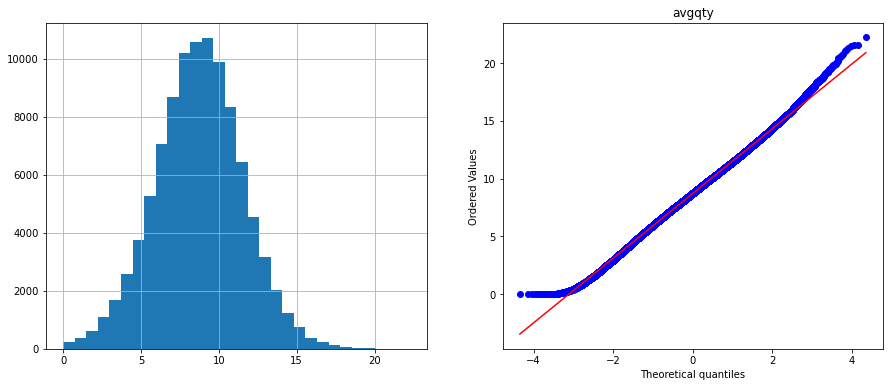

Оптимальное значение λ = 0.30178668977268414


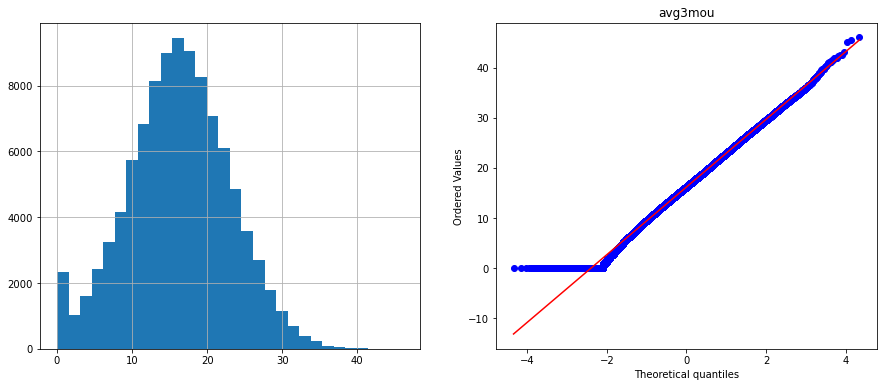

Оптимальное значение λ = 0.2716615443560341


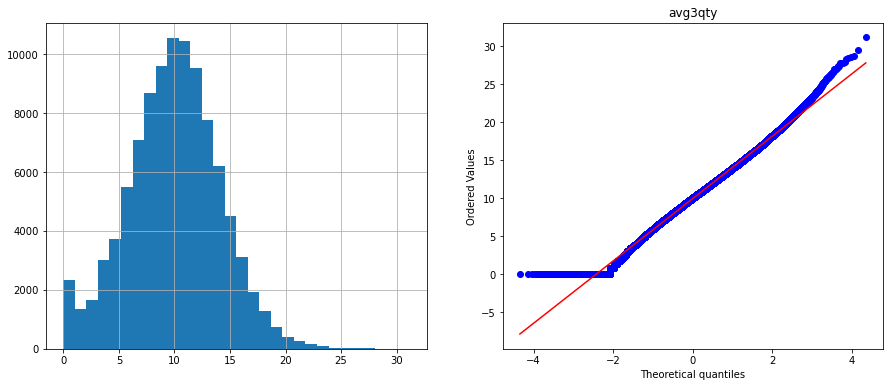

Оптимальное значение λ = 0.026103049598061385


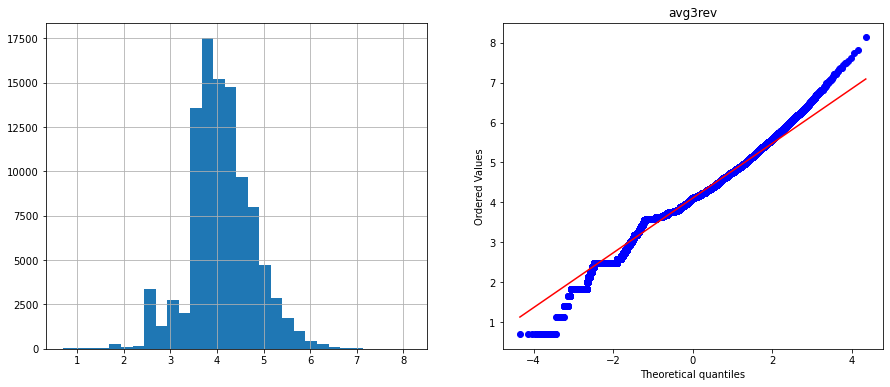

Оптимальное значение λ = 0.33273677126900586


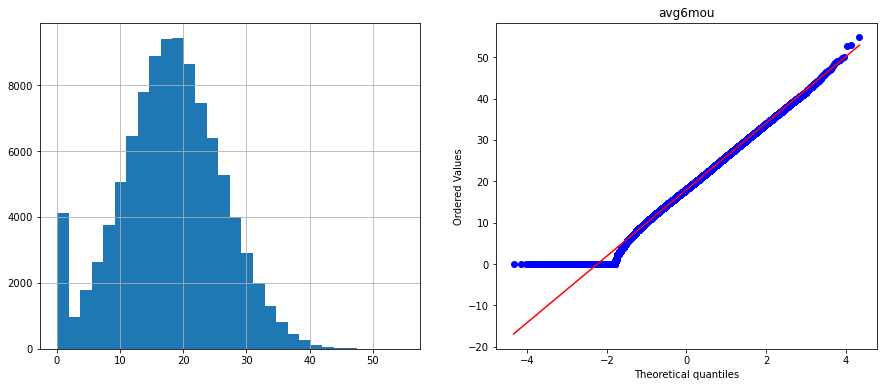

Оптимальное значение λ = 0.3039131944523563


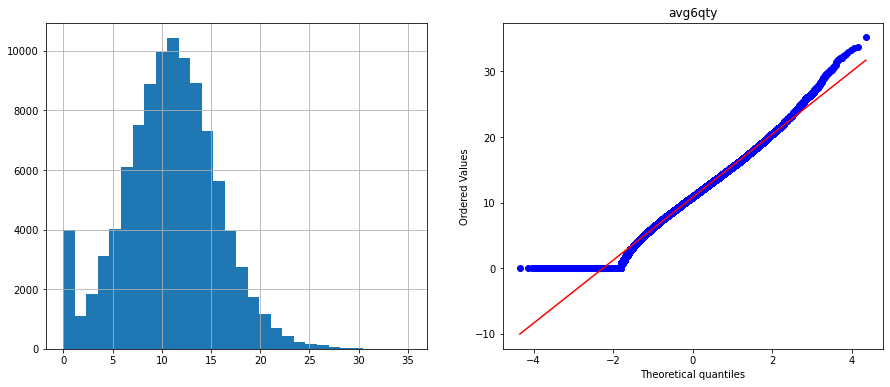

Оптимальное значение λ = 0.036795600800806315


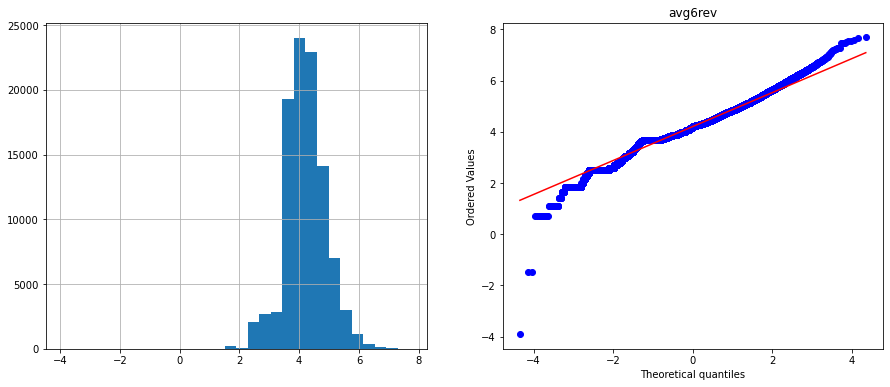

Оптимальное значение λ = 0.49873675567554604


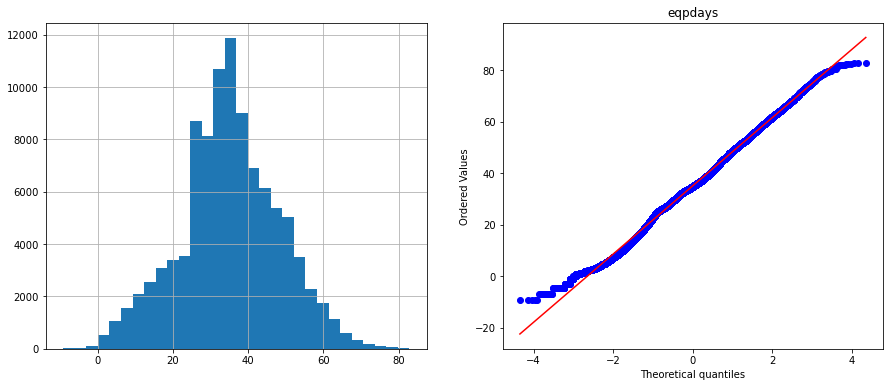

Оптимальное значение λ = 0.1276142287286367


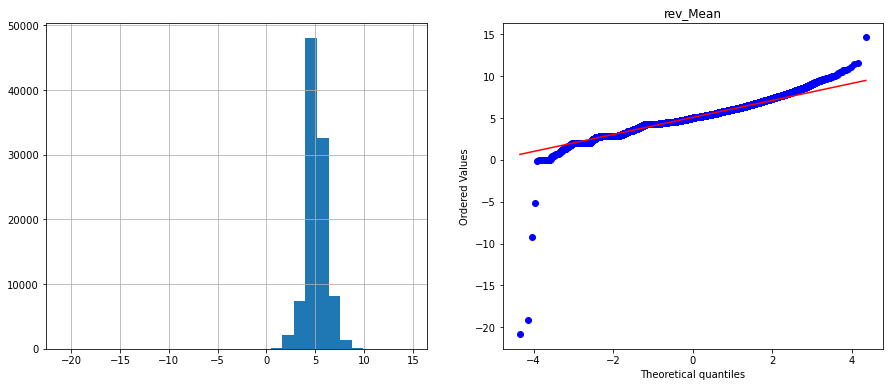

Оптимальное значение λ = 0.30875074299109617


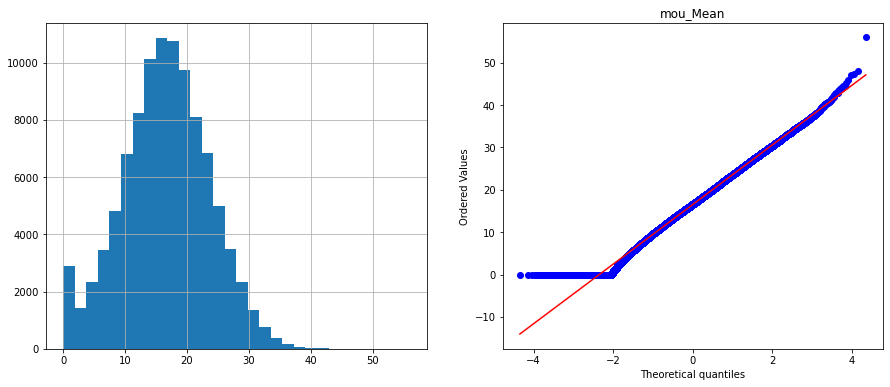

Оптимальное значение λ = 0.5603564552120832


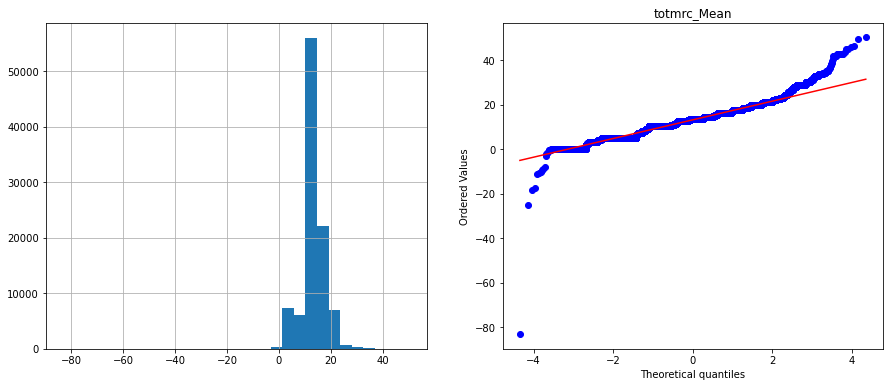

Оптимальное значение λ = -0.5602762391013018


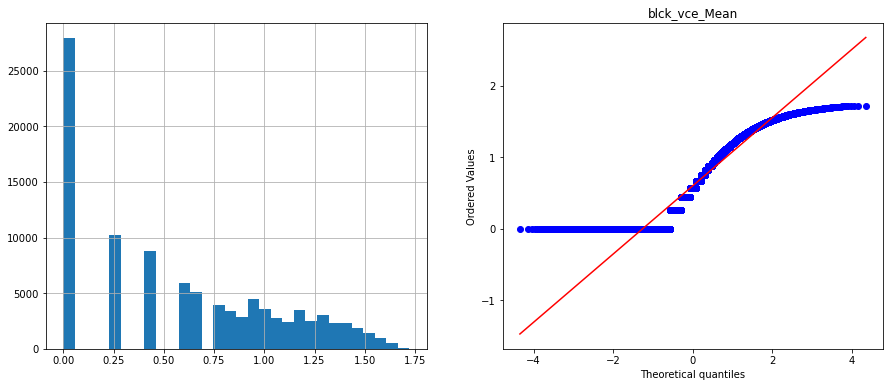

Оптимальное значение λ = 0.13675275996819933


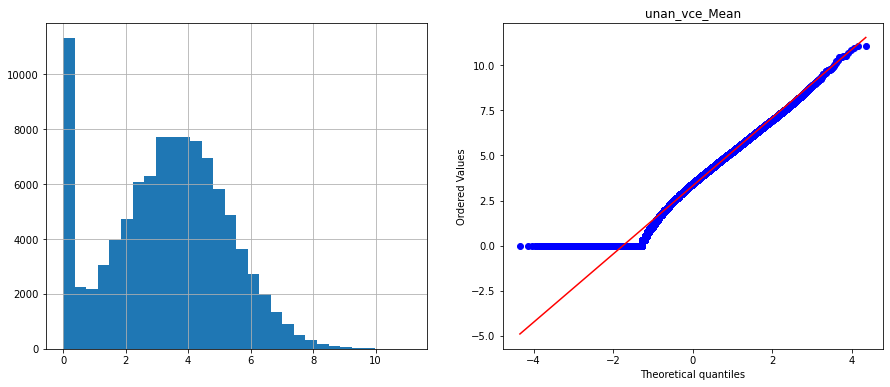

Оптимальное значение λ = 0.3139156407984115


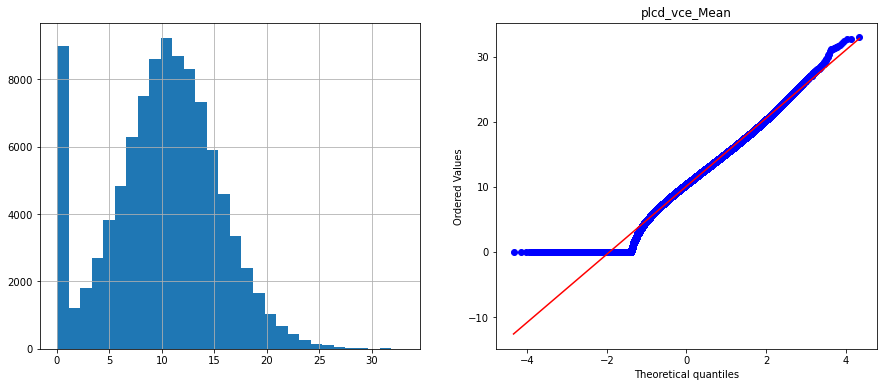

Оптимальное значение λ = 0.3080593060583951


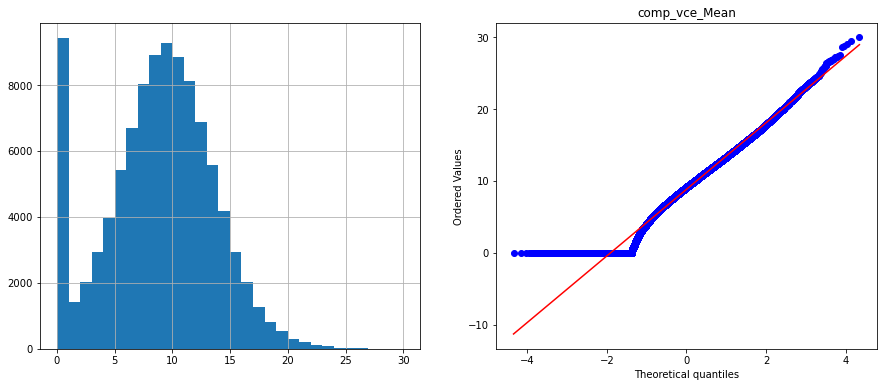

Оптимальное значение λ = 0.28928284808849963


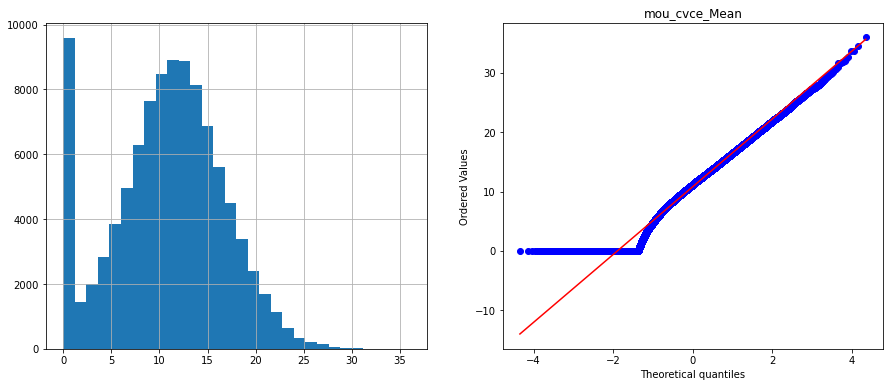

Оптимальное значение λ = 0.15127739048839053


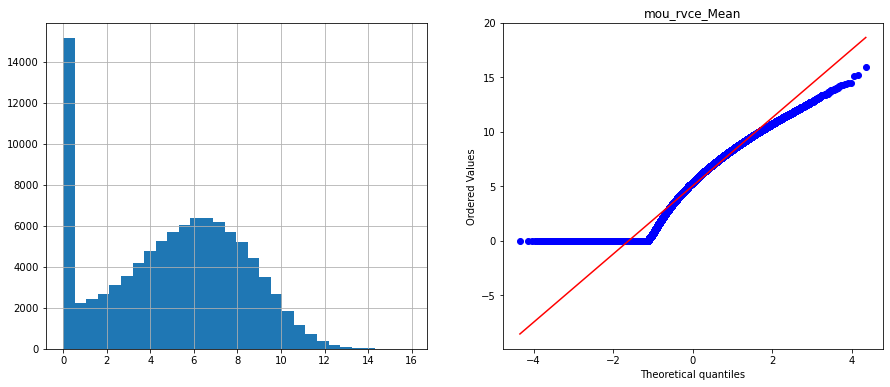

Оптимальное значение λ = 0.10362510478865444


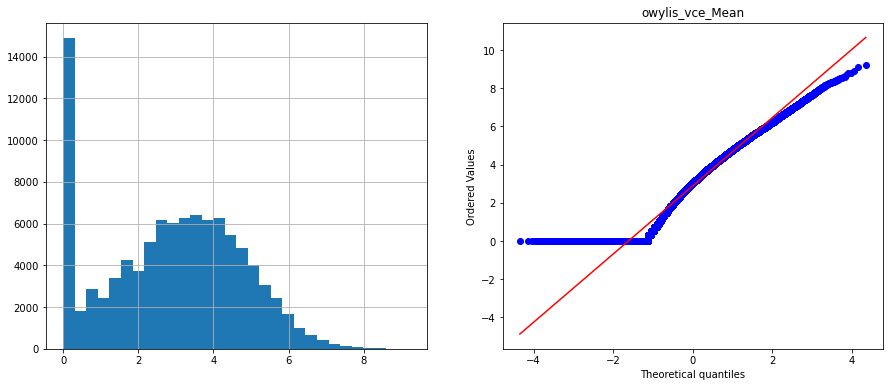

Оптимальное значение λ = 0.2813821669669631


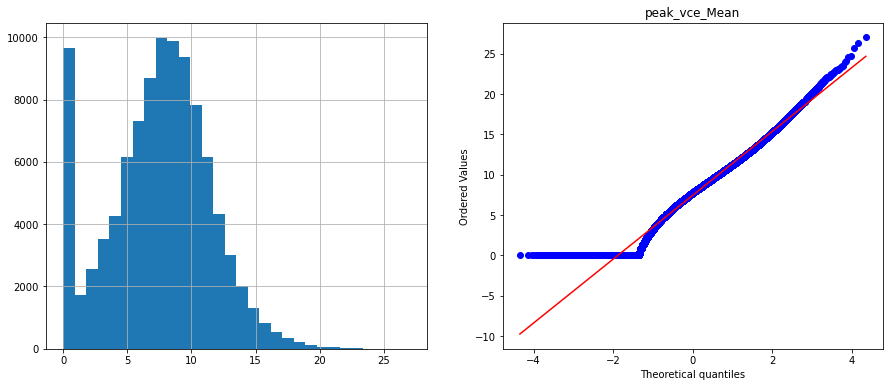

Оптимальное значение λ = 0.2849343655048331


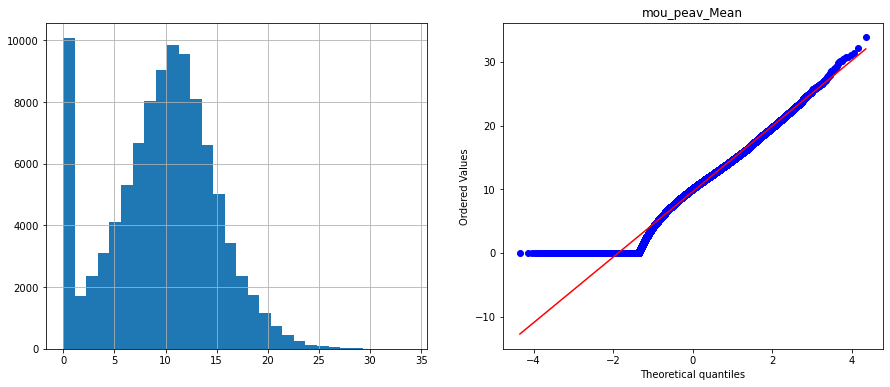

Оптимальное значение λ = 0.17122684871247537


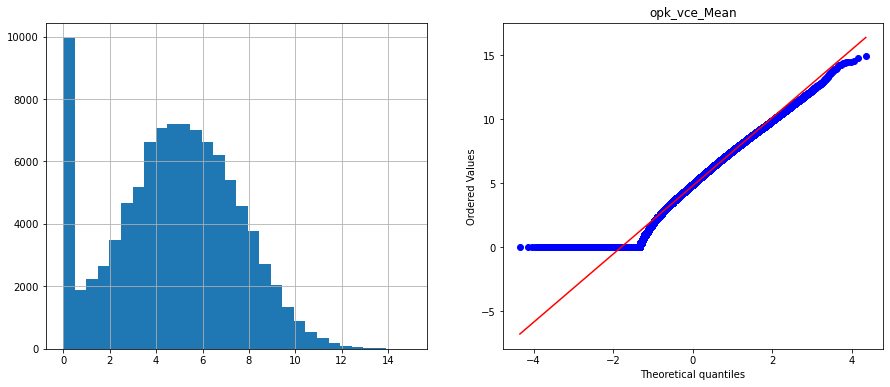

Оптимальное значение λ = 0.1767683220839461


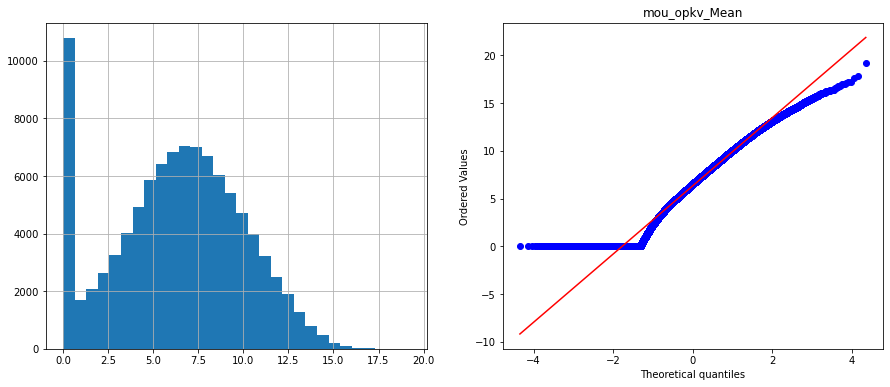

Оптимальное значение λ = 0.3134643954981506


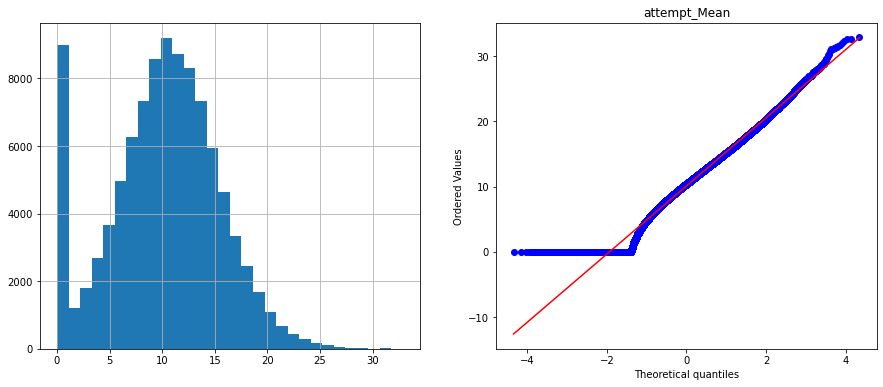

Оптимальное значение λ = 0.3073872075397613


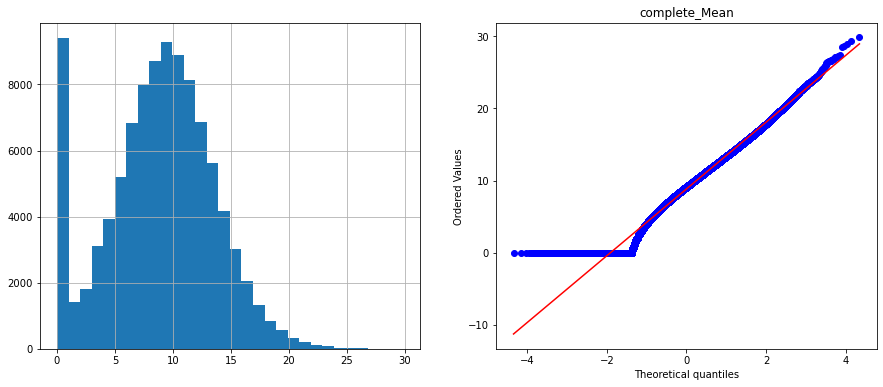

In [60]:
# Необходимо преобразовать данные к действительному типу

for feature in features_norm:
    df_d[feature] = df_d[feature].astype('float')
    df_d[feature], param = stats.yeojohnson(df_d[feature])

    print('Оптимальное значение λ = {}'.format(param))

    diagnostic_plots(df_d, feature)

### Удаление выбросов
Выбросы нужно удалять из обучающей выборке, для обучения модели

Я буду использовать метод межквартильного размаха так как он подходит при почти нормальном распредлении

outleft < Q1 - k* IQR<br>
outright > Q3 + k * IQR, где

IQR = Q3 - Q1

In [61]:
df_d[features_norm]

,months,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,...,comp_vce_Mean,mou_cvce_Mean,mou_rvce_Mean,owylis_vce_Mean,peak_vce_Mean,mou_peav_Mean,opk_vce_Mean,mou_opkv_Mean,attempt_Mean,complete_Mean
0,3.236900,13.274600,21.880300,7.603386,9.330918,22.090656,13.466741,3.608014,8.656252,5.335340,...,7.312164,9.315780,6.619991,0.000000,7.640225,10.647395,4.294077,5.875308,7.905793,7.300959
1,3.186011,20.763485,33.939103,8.295420,10.429886,34.722914,21.358178,4.210622,16.172900,11.084417,...,13.211754,12.324508,5.551906,4.741936,8.837713,8.560361,8.056033,8.371763,15.135950,13.182329
2,3.206946,18.399940,33.318312,7.992092,9.795554,34.063315,18.886718,3.772337,15.640566,9.040764,...,2.665485,2.464430,0.000000,0.000000,2.329961,2.391094,0.735957,0.213656,3.375472,2.663569
3,3.227099,12.998825,20.187557,7.911327,9.801767,20.490028,13.227689,3.944267,7.769907,5.210553,...,1.971335,3.154982,0.355164,0.292013,0.956831,1.836472,1.762708,2.207902,1.980215,1.970235
4,3.196580,16.409569,29.261443,8.004682,9.982075,29.862108,16.791684,3.895691,12.930642,7.437609,...,11.564563,14.299961,6.799608,3.183904,9.370619,11.766192,6.811251,9.009912,14.192859,11.540776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2.684684,15.832254,26.685994,7.666209,9.446269,27.207067,16.198249,4.619807,15.857563,9.770506,...,7.335675,9.483339,1.201724,1.390811,4.890567,5.228431,4.471485,6.458461,8.055732,7.324409
99996,2.734109,15.747629,26.238657,7.612296,9.329156,26.712918,16.085463,4.593003,15.716383,9.820210,...,7.867836,9.708602,3.970635,2.267804,7.763064,10.311103,0.735957,0.333983,8.911118,7.855172
99997,2.822038,12.524134,26.551735,7.280603,8.821948,27.024047,12.705615,4.294526,16.247174,6.927971,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
99998,2.684684,19.306915,32.098816,8.223620,10.281045,32.716919,19.778252,5.197193,20.427932,13.203461,...,17.591266,18.162873,9.296887,4.994890,16.190615,18.634758,8.207592,9.407683,19.893898,17.550287


Объеденим таблицы признаков

In [62]:
frames = [df_alpha, df_d]
df_features = pd.concat(frames, axis=1)
df_features = df_features.drop('churn', axis=1)

In [63]:
X = df_features.copy()
Y = df_original.churn

In [64]:
X.shape, Y.shape

((100000, 135), (100000,))

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_test.shape

(20000, 135)

Мы подготовили данные на два сектора, теперь удалим выбросы в X_train

In [72]:
# Получаем граничные значения
def count_out(df, feature):
    k = 3
    Q1 = df[feature].quantile(0.25) 
    Q3 = df[feature].quantile(0.75)
    IQR =  Q3 - Q1
    
    outleft = Q1 - k*IQR
    outright = Q3 + k*IQR
    
    return outleft, outright

In [73]:
# Перезаписываем фрейм с нужными строками

for col in features_norm:
    outleft, outright = count_out(X_train, col)
    index = np.where(X_train[col] < outleft, True, 
                       np.where(X_train[col] > outright, True, False))
    X_train = X_train.loc[~(index)]
    y_train = y_train.loc[~(index)]
X_train

,crclscod,asl_flag,refurb_new,infobase,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,...,avg6qty,avg6rev,hnd_price,phones,models,truck,rv,numbcars,forgntvl,eqpdays
75220,2,1,1,0,0,0,0,0,0,0,...,22.768765,5.030138,129.98999,1.0,1.0,0.0,0.0,0.0,0.0,28.195084
48955,8,1,1,1,0,0,0,0,0,1,...,12.867937,5.339831,149.98999,1.0,1.0,0.0,0.0,1.0,0.0,45.483025
44966,10,0,1,1,0,0,0,0,0,1,...,2.653697,3.371332,149.98999,1.0,1.0,0.0,0.0,1.0,0.0,44.517487
13568,15,0,1,1,0,0,0,0,0,1,...,18.786724,5.831686,199.98999,2.0,2.0,0.0,0.0,1.0,0.0,34.425111
92727,10,0,1,1,0,0,0,0,0,0,...,10.439147,4.060314,59.98999,1.0,1.0,0.0,0.0,0.0,0.0,32.244308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,1,0,1,1,0,0,0,0,0,1,...,15.427695,4.970024,149.98999,5.0,4.0,0.0,0.0,3.0,0.0,21.738937
54886,10,0,1,1,0,0,0,0,0,1,...,12.381185,4.160485,199.98999,1.0,1.0,0.0,0.0,0.0,0.0,40.620725
76820,18,1,1,0,0,0,0,0,0,0,...,8.830598,3.830512,199.98999,2.0,1.0,0.0,0.0,0.0,0.0,16.269095
860,1,0,1,1,0,0,0,0,0,1,...,9.626851,4.970024,149.98999,7.0,5.0,1.0,0.0,3.0,0.0,28.129526


### Обучение моделей
- обучение моделей
- Сравнение отклонений

In [74]:
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn import svm

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import itertools
from itertools import product

**В задачи классификации важна общая оценка accuracy не показательна.**

Модель может хорошо определять churn=0, но плохо churn=1.

В этом случае accuracy, которая считает долю правильно данных ответов не выявит этого.<br>
Нам надо смотреть на матрицу ошибок и ROC-кривую.

- TP - True Positive
- TN - True Negativ
- FP - False Positive
- FN - False Negativ

**precision** = TP/ TP + FP     - процент истинно положительных

**recall** = TP / TP + FN       - процент найденных положительных

<img src='https://habrastorage.org/r/w1560/web/38e/9d4/892/38e9d4892d9241ea95e1f56e3ef9124c.png' alt="вот">

In [81]:
#X_train, X_test, y_train, y_true 
models_dict = {}
def make_model(name, model, **args):
    model = model(**args)
    
    model.fit(X_train, y_train)
    y_res = model.predict(X_test)
    
    # Матрица ошибок
    conf_matr = confusion_matrix(y_test, y_res)
    
    cmd_obj = ConfusionMatrixDisplay(conf_matr, display_labels=['1', '0'])
    cmd_obj.plot()

    cmd_obj.ax_.set(
                    title='Матрица ошибок', 
                    xlabel='Результаты модели', 
                    ylabel='Истинное значение')
    plt.show()    
    # сохраняем вероятности только для положительного исхода
    sns.set(font_scale=1.5)
    sns.set_color_codes("muted")

    plt.figure(figsize=(10, 8))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label=1)
    lw = 2
    roc_auc = auc(fpr, tpr)
    models_dict[name] = roc_auc
    print(roc_auc)
    plt.plot(fpr, tpr, lw=lw, label=f'ROC curve {roc_auc};\nROC кривая (area = %0.2f)' % roc_auc, color='navy')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.savefig("ROC.png")
    plt.show()



Логистическая регрессия

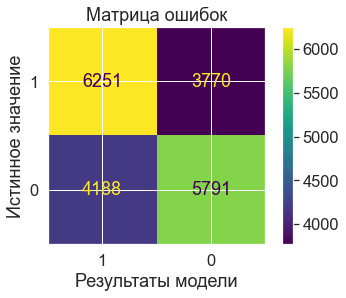

0.6411233573540058


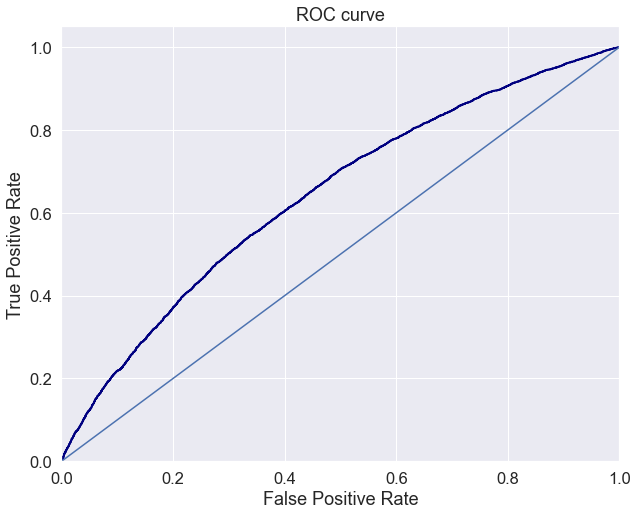

In [82]:
make_model('LogisticRegression', LogisticRegression, solver='lbfgs', max_iter=10000 )

СЛучайный лес

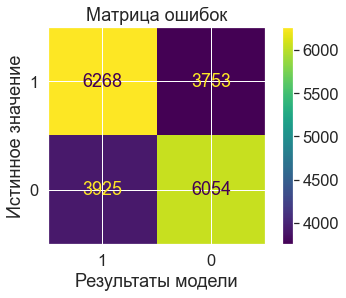

0.6669449362271688


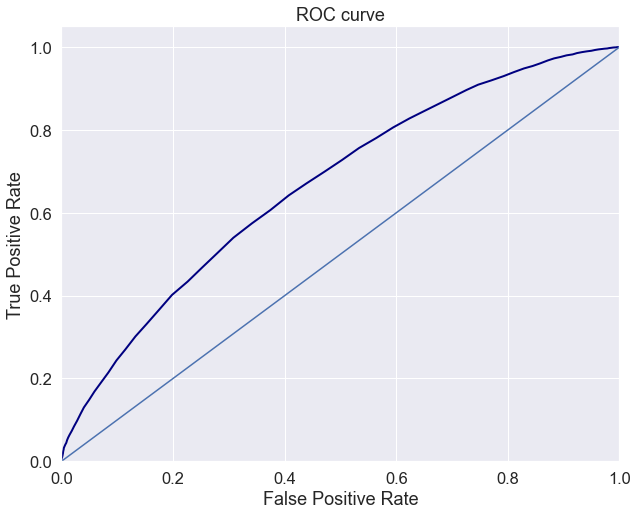

In [83]:
make_model('RandomForestClassifier', RandomForestClassifier)

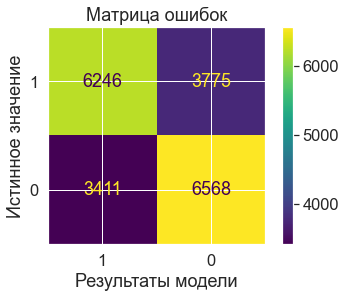

0.6959811292767801


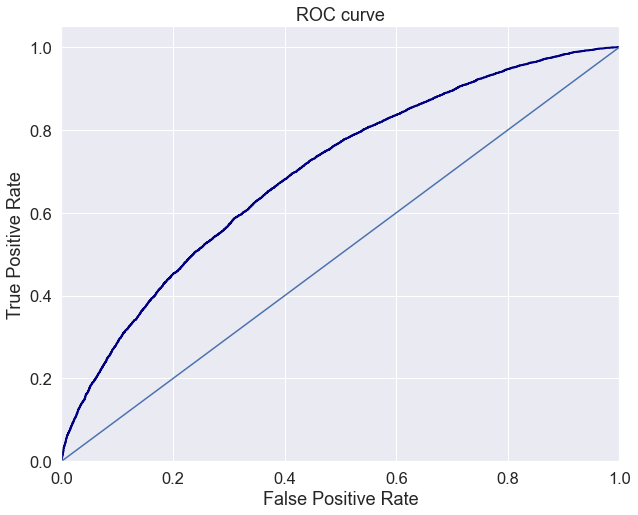

In [84]:
make_model('LGBMClassifier', lgb.LGBMClassifier)

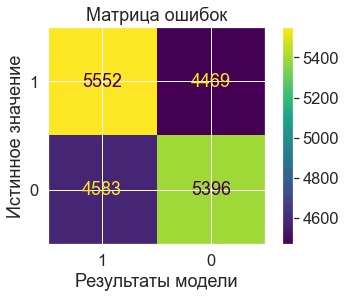

0.5473860339724098


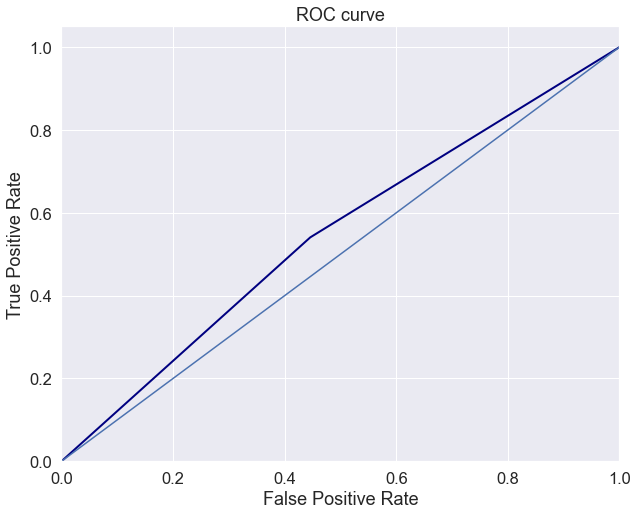

In [85]:
make_model('DecisionTreeClassifier', DecisionTreeClassifier)

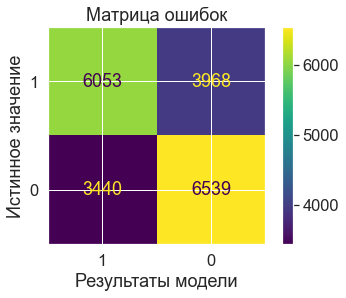

0.6831296926019443


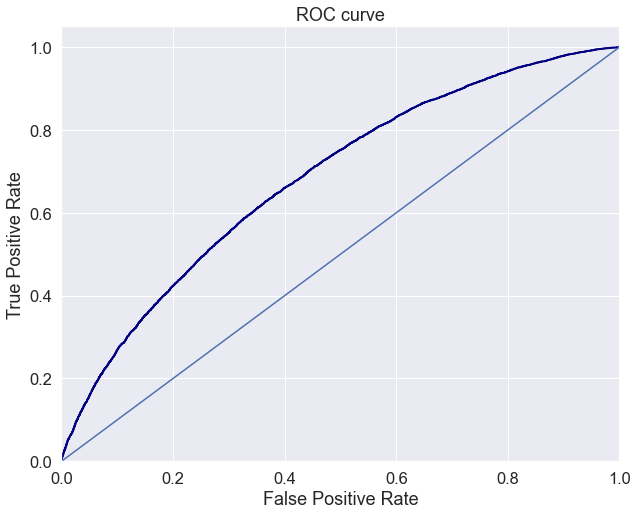

In [86]:
make_model('GradientBoostingClassifier', GradientBoostingClassifier)

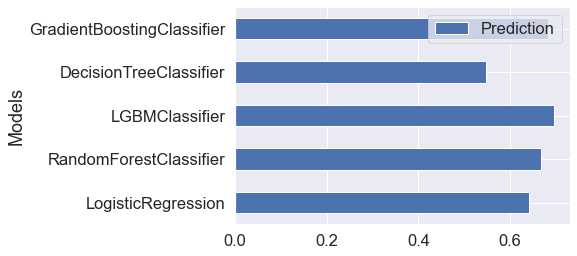

In [93]:
df = pd.DataFrame({'Models':models_dict.keys(), 'Prediction':models_dict.values()})
ax = df.plot.barh(x='Models', y='Prediction', rot=0)

DONE